In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, exposure, morphology, color, segmentation
from skimage.filters import threshold_otsu
from skimage.morphology import disk
from skimage.segmentation import active_contour

Задание 1: Фильтрация и улучшение контраста

In [39]:
# Загрузка изображения
image = io.imread('Изображения/2.tif', as_gray=True)

# Применение медианного фильтра
median_filtered = filters.median(image, disk(3))

(-0.5, 2583.5, 1935.5, -0.5)

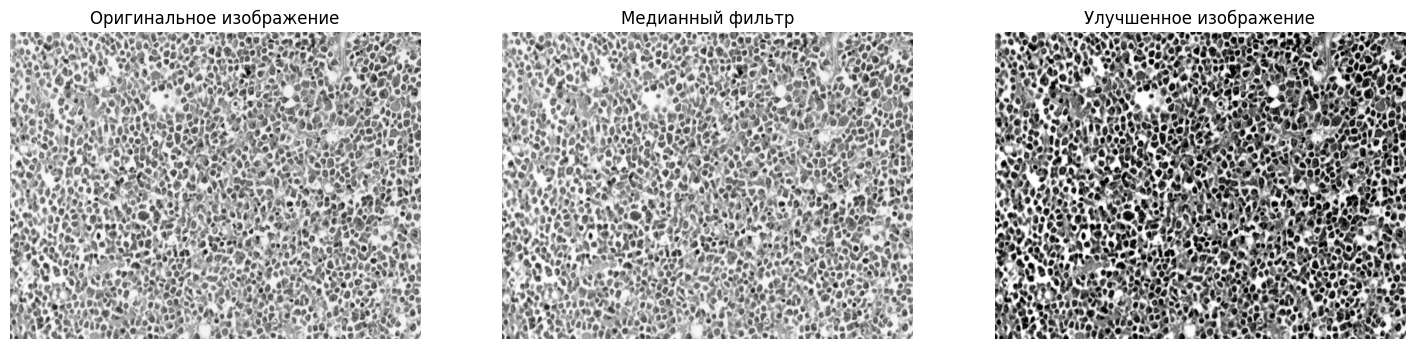

In [40]:
# Улучшение контраста
equalized = exposure.equalize_hist(median_filtered)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Оригинальное изображение')
axes[0].axis('off')

axes[1].imshow(median_filtered, cmap='gray')
axes[1].set_title('Медианный фильтр')
axes[1].axis('off')

axes[2].imshow(equalized, cmap='gray')
axes[2].set_title('Улучшенное изображение')
axes[2].axis('off')

Задание 2: Пороговая сегментация

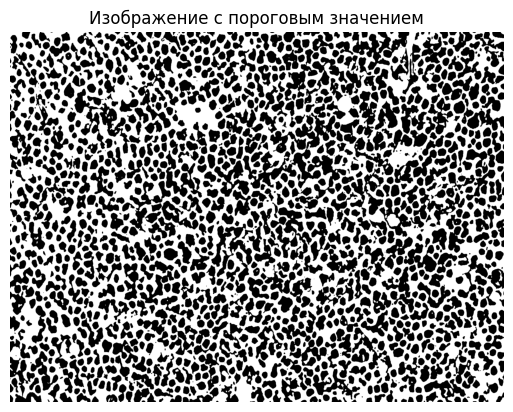

In [41]:
# Вычисление порога с помощью метода Отсу
thresh = threshold_otsu(equalized)

# Применение порога
binary_image = equalized > thresh

# Визуализация
plt.imshow(binary_image, cmap='gray')
plt.title('Изображение с пороговым значением')
plt.axis('off')
plt.show()

Задание 3: Операции открытия и закрытия

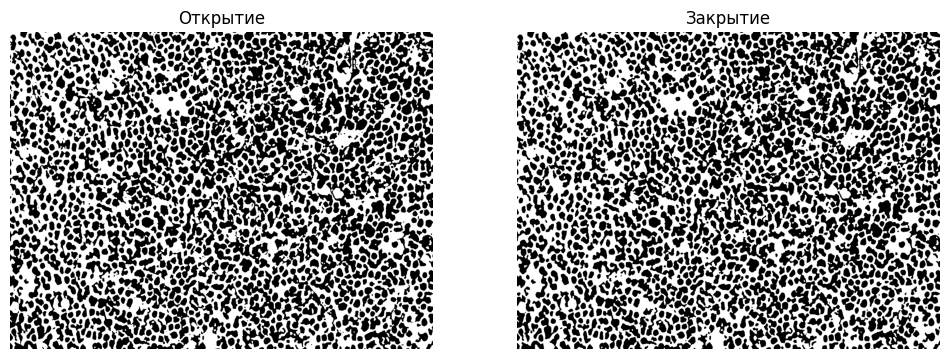

In [42]:
# Применение операции открытия и закрытия
opened_image = morphology.opening(binary_image, morphology.disk(3))
closed_image = morphology.closing(opened_image, morphology.disk(3))

# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(opened_image, cmap='gray')
ax[0].set_title('Открытие')
ax[0].axis('off')

ax[1].imshow(closed_image, cmap='gray')
ax[1].set_title('Закрытие')
ax[1].axis('off')
plt.show()

Задание 4: Метод активных контуров

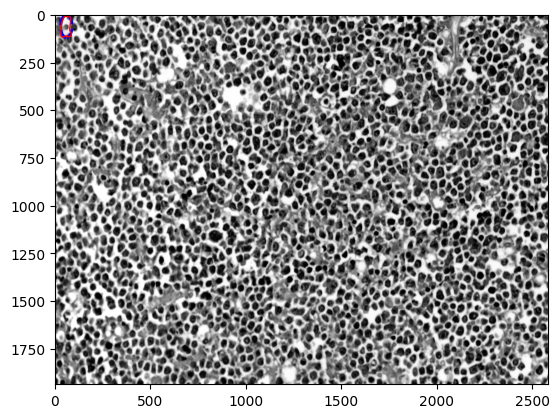

In [83]:
# Задаем параметры эллипса
a = 60  # Большая полуось
b = 30  # Малая полуось
center_x = 60
center_y = 60
angle = np.pi / 2  # Угол поворота эллипса (в радианах)

# Создаем массив углов
s = np.linspace(0, 2 * np.pi, 400)

# Вычисляем координаты точек эллипса
x = center_x + a * np.cos(s) * np.cos(angle) - b * np.sin(s) * np.sin(angle)
y = center_y + a * np.cos(s) * np.sin(angle) + b * np.sin(s) * np.cos(angle)

# Объединяем координаты в матрицу
init = np.array([x, y]).T

# Применение активного контура
snake = segmentation.active_contour(image, init, alpha=0.015, beta=10, gamma=0.001, max_px_move=1.0, max_num_iter=2500, convergence=0.1, boundary_condition='periodic')
# snake = active_contour(equalized, init, alpha=0.015, beta=10, w_line=0, w_edge=1, gamma=0.001, max_px_move=1.0, max_num_iter=2500, convergence=0.1, boundary_condition='periodic')
    # init: Начальная форма контура, представлена как массив координат.
    # alpha (elasticity): Управляет гладкостью контура. Увеличение alpha делает контур более гладким и менее чувствительным к деталям изображения.
    # beta (rigidity): Управляет жесткостью. Увеличение beta помогает контуру выпрямляться, что полезно для избегания ложных срабатываний на мелких деталях.
    # gamma (step size): Управляет скоростью обновления контура. Увеличение gamma может помочь контуру быстрее адаптироваться к границам.
    # w_line: Вес линейного термина. Используется, если необходимо учитывать серые уровни изображения. Обычно устанавливается в 0 для выделения границ.
    # w_edge: Вес термина границы. Определяет, насколько контур должен следовать за границами. Большие значения помогают лучше выделять границы.
    # max_px_move: Максимальное количество пикселей, на которое контур может перемещаться за одну итерацию.
    # max_num_iter: Максимальное количество итераций для процесса оптимизации.
    # convergence: Стоп-критерий. Если изменение контура меньше этого значения в течение 10 итераций, процесс останавливается.
    # boundary_condition: Условия на границах. 'periodic' означает, что контур замкнут. Альтернативно можно использовать 'free' для открытого контура.

# Визуализация результата
fig, ax = plt.subplots()
ax.imshow(equalized, cmap='gray')

# Начальный контур:
ax.plot(init[:, 0], init[:, 1], '--b', lw=2)
# Конечный контур:
ax.plot(snake[:, 0], snake[:, 1], '-r', lw=1)

In [45]:
help(active_contour)

Help on function active_contour in module skimage.segmentation.active_contour_model:

active_contour(image, snake, alpha=0.01, beta=0.1, w_line=0, w_edge=1, gamma=0.01, max_px_move=1.0, max_num_iter=2500, convergence=0.1, *, boundary_condition='periodic')
    Active contour model.
    
    Active contours by fitting snakes to features of images. Supports single
    and multichannel 2D images. Snakes can be periodic (for segmentation) or
    have fixed and/or free ends.
    The output snake has the same length as the input boundary.
    As the number of points is constant, make sure that the initial snake
    has enough points to capture the details of the final contour.
    
    Parameters
    ----------
    image : (M, N) or (M, N, 3) ndarray
        Input image.
    snake : (K, 2) ndarray
        Initial snake coordinates. For periodic boundary conditions, endpoints
        must not be duplicated.
    alpha : float, optional
        Snake length shape parameter. Higher values makes s